In [33]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
os.listdir("/content/drive/MyDrive/chest_xray_pneumonia")

['val', 'train', 'test', 'pneumonia_detection_vgg16.pth']

In [36]:
len(os.listdir("/content/drive/MyDrive/chest_xray_pneumonia/train/PNEUMONIA"))

3875

<p>The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.
</p>

<h2>Data Visualization</h2>

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


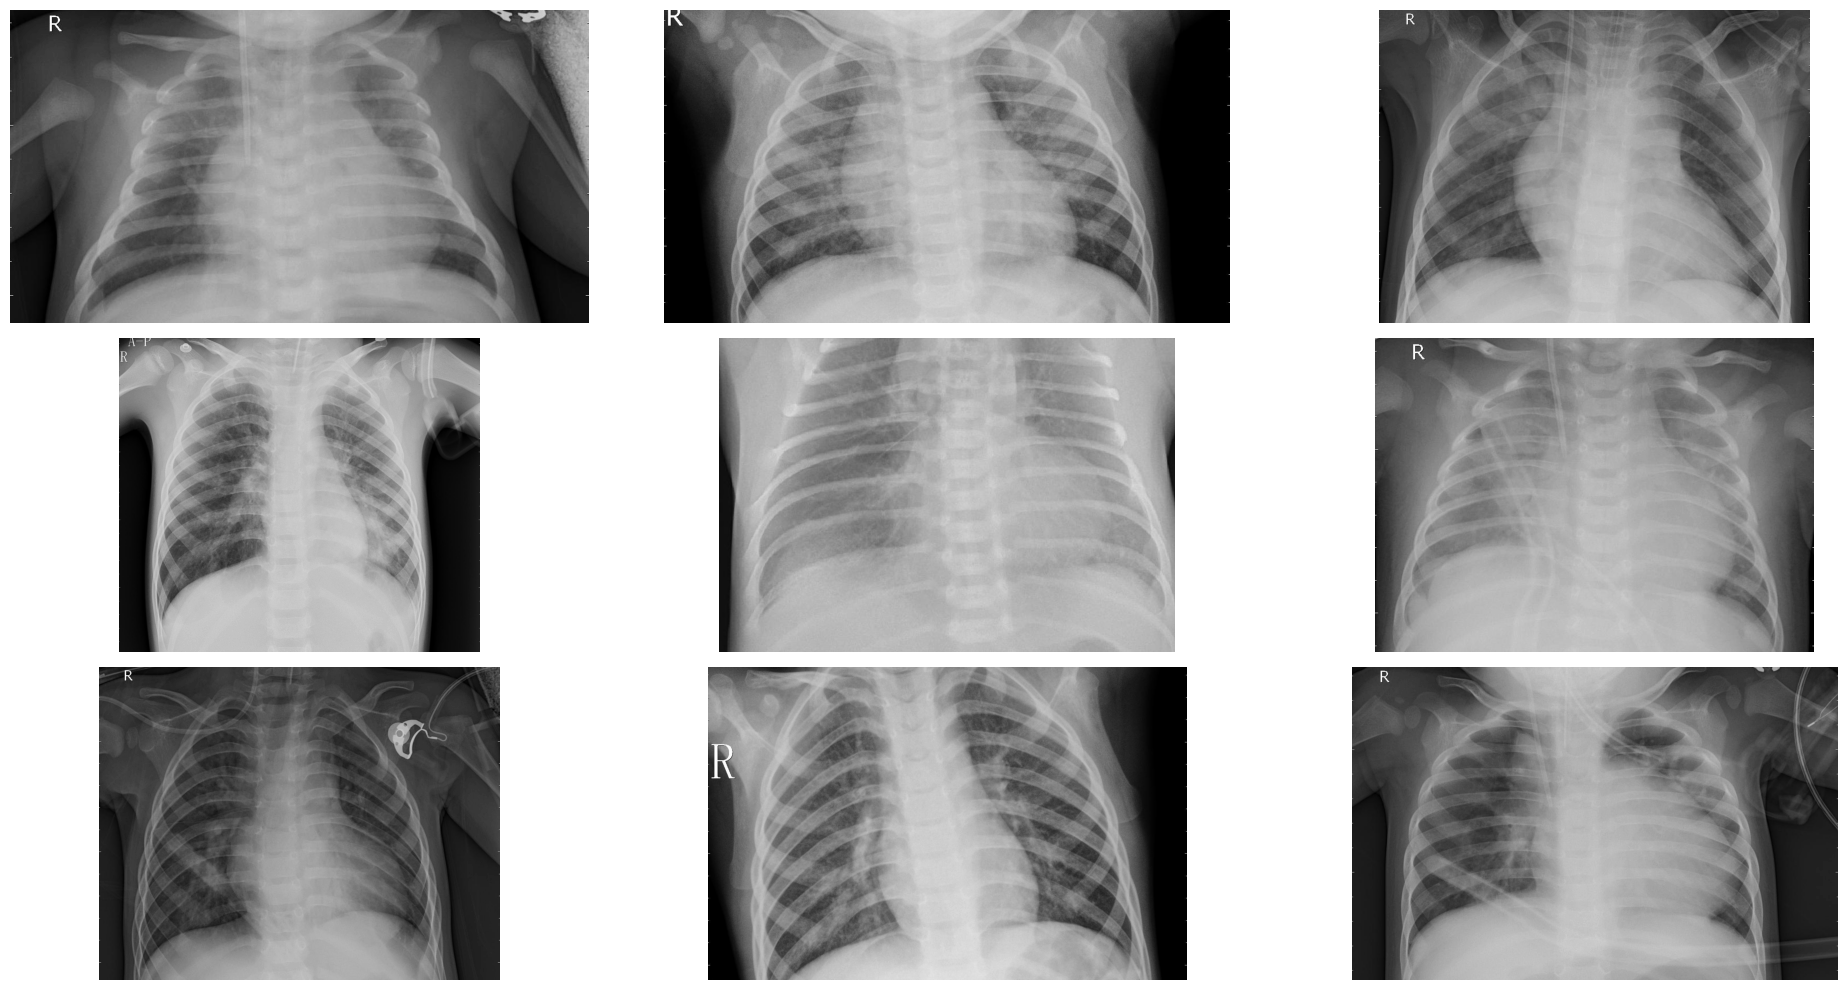

In [37]:
train_dir = "/content/drive/MyDrive/chest_xray_pneumonia/train"
test_dir = "/content/drive/MyDrive/chest_xray_pneumonia/test"
val_dir = "/content/drive/MyDrive/chest_xray_pneumonia/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/chest_xray_pneumonia/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/chest_xray_pneumonia/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

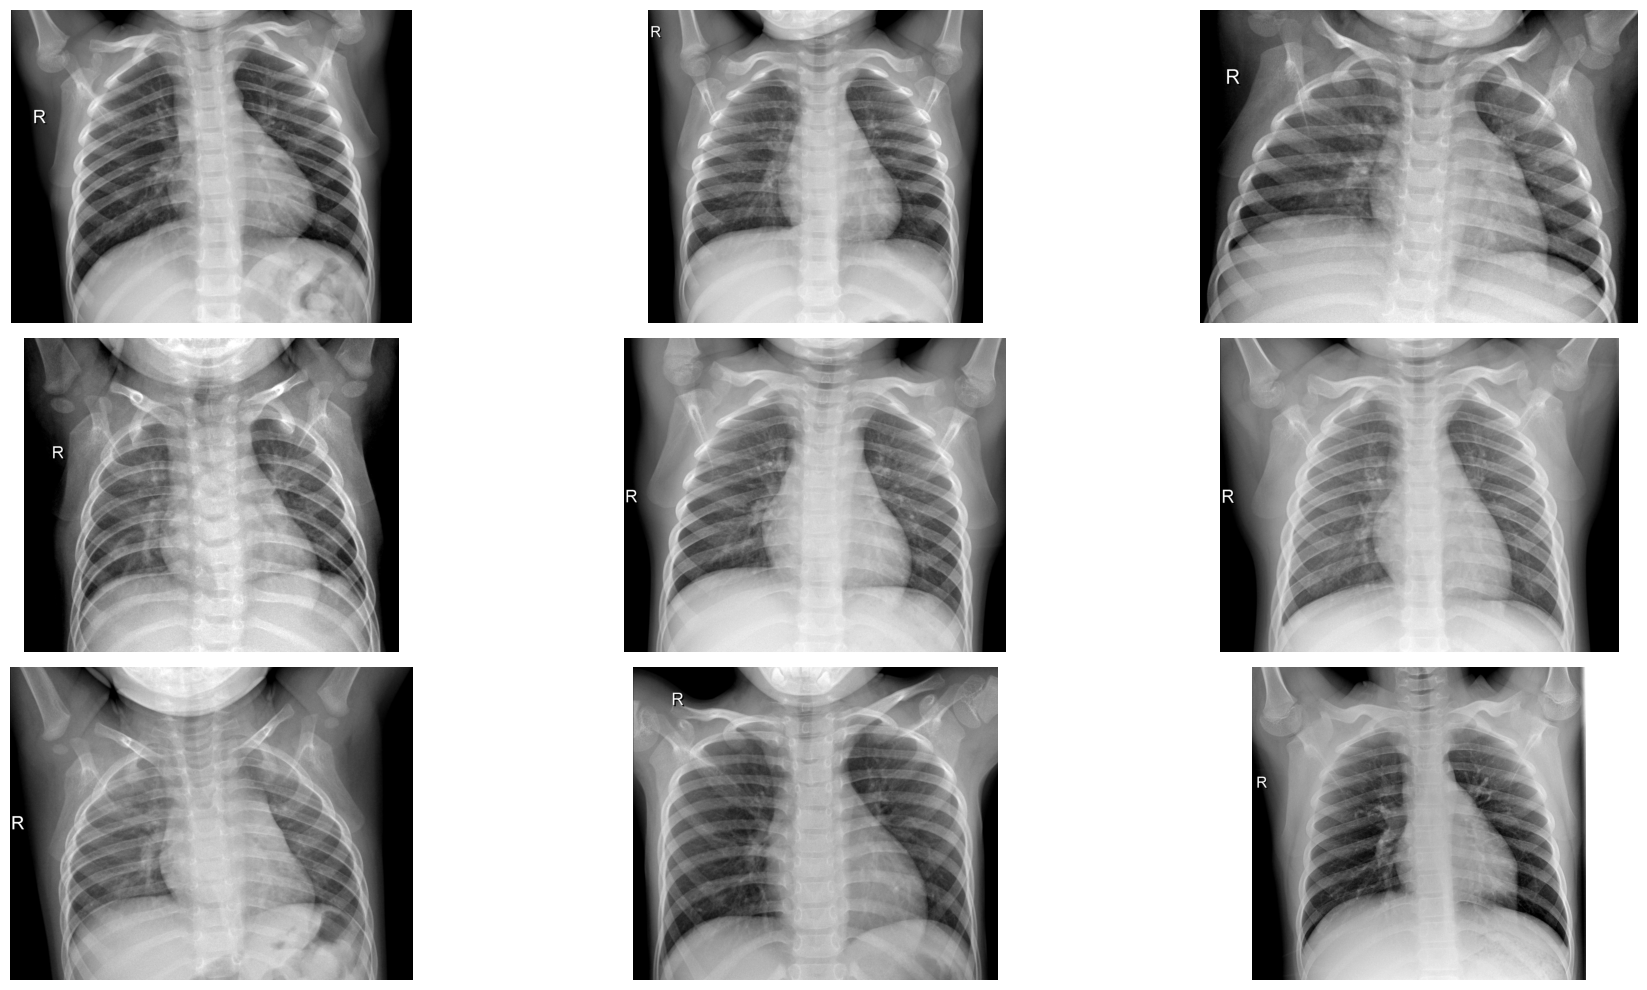

In [38]:
normal = os.listdir("/content/drive/MyDrive/chest_xray_pneumonia/train/NORMAL")
normal_dir = "/content/drive/MyDrive/chest_xray_pneumonia/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1577 pixels width and 2014 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 113.8051 and the standard deviation is 67.9693


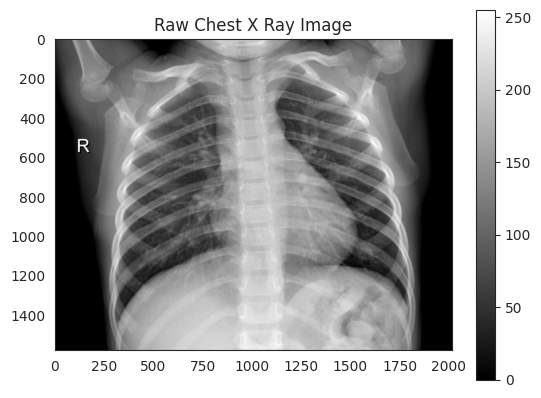

In [39]:
normal_img = os.listdir("/content/drive/MyDrive/chest_xray_pneumonia/train/NORMAL")[0]
normal_dir = "/content/drive/MyDrive/chest_xray_pneumonia/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

<h2>Investigate pixel value distribution</h2>

<ipython-input-40-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

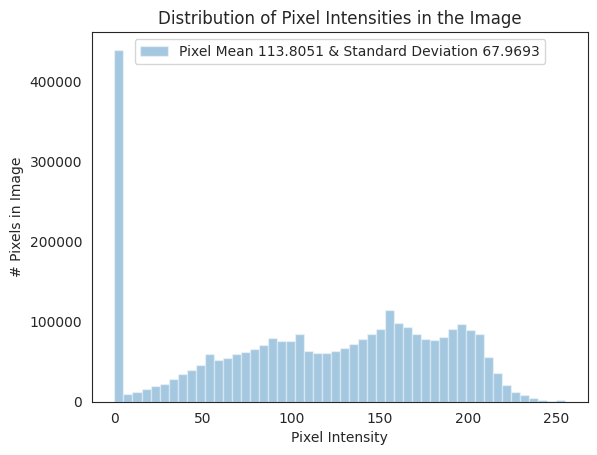

In [40]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

<h2>Image Preprocessing</h2>

In [41]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

<h2>Build a separate generator fo valid and test sets</h2>

In [42]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.7124 and the minimum is -3.1842
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


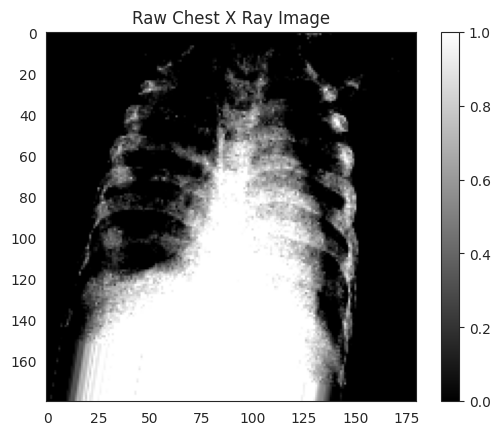

In [43]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-44-3361fab08a7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

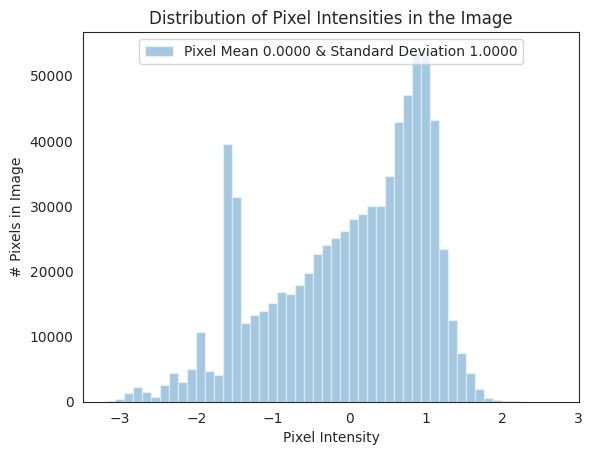

In [44]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

<h2>Building a CNN model</h2>

In [45]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                      

In [48]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.9179 - accuracy: 0.8000

100/100 [==============================] - 350s 3s/step - loss: 0.9179 - accuracy: 0.8000 - val_loss: 14.3284 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 265s 3s/step - loss: 0.3690 - accuracy: 0.8050
Epoch 3/10
100/100 [==============================] - 216s 2s/step - loss: 0.1516 - accuracy: 0.8813
Epoch 4/10
100/100 [==============================] - 198s 2s/step - loss: 0.1325 - accuracy: 0.8938
Epoch 5/10
100/100 [==============================] - 164s 2s/step - loss: 0.1015 - accuracy: 0.8863
Epoch 6/10
100/100 [==============================] - 145s 1s/step - loss: 0.0988 - accuracy: 0.9038
Epoch 7/10
100/100 [==============================] - 128s 1s/step - loss: 0.1323 - accuracy: 0.8637
Epoch 8/10
100/100 [==============================] - 115s 1s/step - loss: 0.0918 - accuracy: 0.9038
Epoch 9/10
100/100 [==============================] - 94s 933ms/step - loss: 0.0764 - accuracy: 0.9225
Epoch 10/10
100/100 [==============================] - 76

Text(0.5, 1.0, 'Accuracy Evolution')

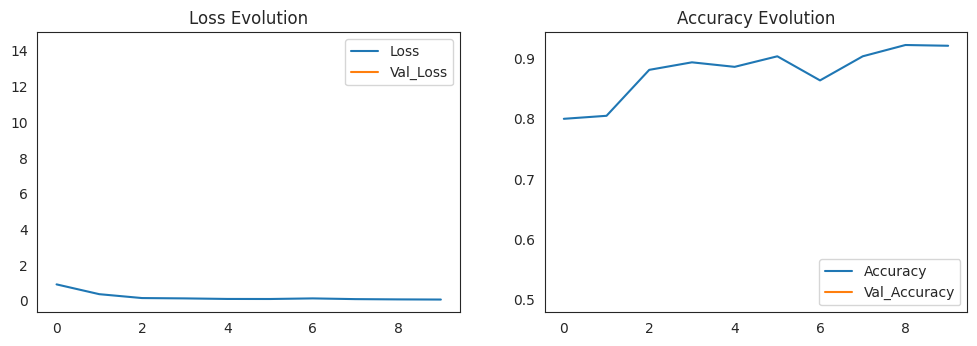

In [49]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [50]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 327s 524ms/step - loss: 0.5115 - accuracy: 0.8045
Test Accuracy: 80.45%
652/652 [==============================] - 456s 701ms/step - loss: 0.2953 - accuracy: 0.8905
Train Accuracy: 89.05%


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 17s 26ms/step
[[171  63]
 [ 45 345]]


,0,1,accuracy,macro avg,weighted avg
precision,0.791667,0.845588,0.826923,0.818627,0.825368
recall,0.730769,0.884615,0.826923,0.807692,0.826923
f1-score,0.760000,0.864662,0.826923,0.812331,0.825414
support,234.000000,390.000000,0.826923,624.000000,624.000000


In [52]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[189  45]
 [ 61 329]]


,0,1,accuracy,macro avg,weighted avg
precision,0.756000,0.879679,0.830128,0.817840,0.833299
recall,0.807692,0.843590,0.830128,0.825641,0.830128
f1-score,0.780992,0.861257,0.830128,0.821124,0.831157
support,234.000000,390.000000,0.830128,624.000000,624.000000


<h2>Transfer Learning</h2>

<h2>DenseNet121</h2>

In [53]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

In [54]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [55]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [56]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [57]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.8325

100/100 [==============================] - 102s 243ms/step - loss: 0.1720 - accuracy: 0.8325 - val_loss: 8.3218 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 20s 198ms/step - loss: 0.1230 - accuracy: 0.8737
Epoch 3/10
100/100 [==============================] - 22s 219ms/step - loss: 0.1068 - accuracy: 0.8950
Epoch 4/10
100/100 [==============================] - 20s 200ms/step - loss: 0.1222 - accuracy: 0.8687
Epoch 5/10
100/100 [==============================] - 22s 224ms/step - loss: 0.1078 - accuracy: 0.8875
Epoch 6/10
100/100 [==============================] - 20s 198ms/step - loss: 0.0707 - accuracy: 0.9300
Epoch 7/10
100/100 [==============================] - 22s 216ms/step - loss: 0.0828 - accuracy: 0.9000
Epoch 8/10
100/100 [==============================] - 20s 196ms/step - loss: 0.0946 - accuracy: 0.9125
Epoch 9/10
100/100 [==============================] - 22s 224ms/step - loss: 0.1060 - accuracy: 0.8825
Epoch 10/10
100/100 [====================

Text(0.5, 1.0, 'Accuracy Evolution')

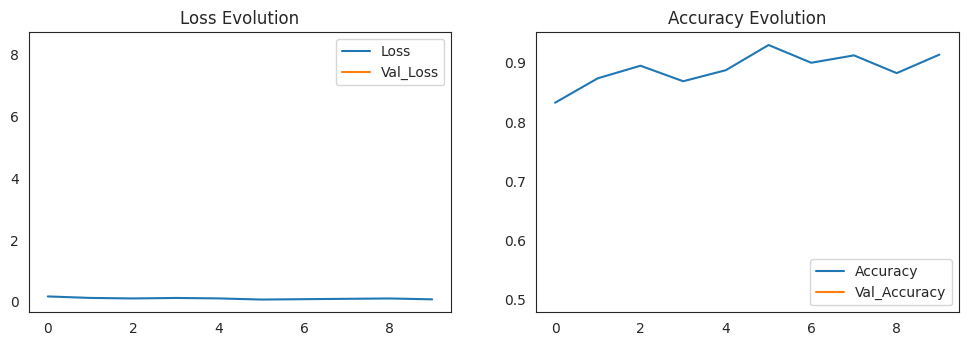

In [58]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [59]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 18s 29ms/step - loss: 0.3485 - accuracy: 0.8526
Test Accuracy: 85.26%
652/652 [==============================] - 112s 172ms/step - loss: 0.4926 - accuracy: 0.7991
Train Accuracy: 79.91%


<h2>Evaluation</h2>

In [60]:
predicted_vals = model.predict(test, steps=len(test))

624/624 [==============================] - 19s 26ms/step


In [61]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[211  23]
 [ 71 319]]


,0,1,accuracy,macro avg,weighted avg
precision,0.748227,0.932749,0.849359,0.840488,0.863553
recall,0.901709,0.817949,0.849359,0.859829,0.849359
f1-score,0.817829,0.871585,0.849359,0.844707,0.851426
support,234.000000,390.000000,0.849359,624.000000,624.000000


<h2>VGG16</h2>

In [62]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 2s 0us/step


In [63]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [64]:
vgg16_model = Sequential([
    vgg16_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.6),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])
    
model = Sequential()
model.add(vgg16_model.layers[0])

In [66]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [67]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.6475 - precision: 0.8693 - recall: 0.6275

100/100 [==============================] - 34s 216ms/step - loss: 0.2757 - accuracy: 0.6475 - precision: 0.8693 - recall: 0.6275 - val_loss: 19.9071 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 20s 201ms/step - loss: 0.2194 - accuracy: 0.7138 - precision: 0.9171 - recall: 0.6734
Epoch 3/10
100/100 [==============================] - 20s 201ms/step - loss: 0.1952 - accuracy: 0.7437 - precision: 0.9083 - recall: 0.7185
Epoch 4/10
100/100 [==============================] - 20s 196ms/step - loss: 0.1840 - accuracy: 0.7875 - precision: 0.9419 - recall: 0.7692
Epoch 5/10
100/100 [==============================] - 19s 189ms/step - loss: 0.1715 - accuracy: 0.7875 - precision: 0.9243 - recall: 0.7785
Epoch 6/10
100/100 [==============================] - 20s 197ms/step - loss: 0.1446 - accuracy: 0.8350 - precision: 0.9580 - recall: 0.8203
Epoch 7/10
100/100 [==============================] - 19s 187ms/step - loss

Text(0.5, 1.0, 'Accuracy Evolution')

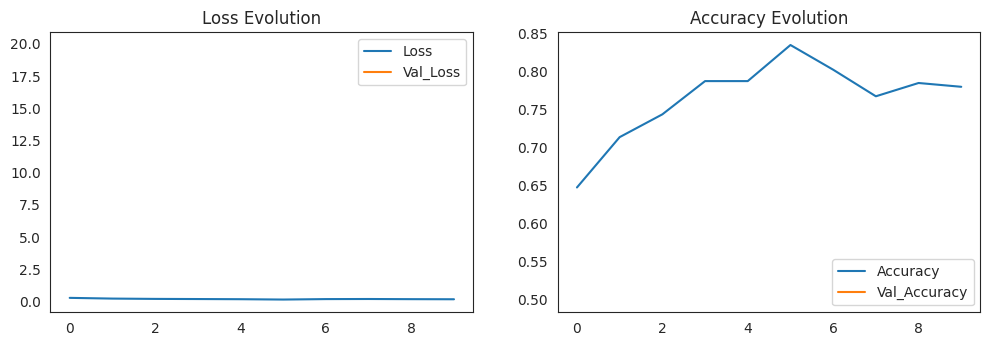

In [68]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [69]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 16s 26ms/step - loss: 3.5026 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Test Accuracy: 62.50%
652/652 [==============================] - 116s 178ms/step - loss: 2.2888 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000
Train Accuracy: 74.29%


<h2>ResNet50</h2>

In [70]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [71]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [72]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
        ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [73]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.6650 - precision: 0.8980 - recall: 0.6459

100/100 [==============================] - 64s 198ms/step - loss: 0.2410 - accuracy: 0.6650 - precision: 0.8980 - recall: 0.6459 - val_loss: 1.2113 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 19s 193ms/step - loss: 0.2909 - accuracy: 0.6888 - precision: 0.8521 - recall: 0.6968
Epoch 3/10
100/100 [==============================] - 19s 187ms/step - loss: 0.2541 - accuracy: 0.6787 - precision: 0.8639 - recall: 0.6734
Epoch 4/10
100/100 [==============================] - 19s 191ms/step - loss: 0.2191 - accuracy: 0.7125 - precision: 0.8874 - recall: 0.6919
Epoch 5/10
100/100 [==============================] - 21s 208ms/step - loss: 0.2393 - accuracy: 0.6862 - precision: 0.8701 - recall: 0.6779
Epoch 6/10
100/100 [==============================] - 19s 187ms/step - loss: 0.1967 - accuracy: 0.7400 - precision: 0.9239 - recall: 0.7107
Epoch 7/10
100/100 [==============================] - 20s 198ms/step - loss:

Text(0.5, 1.0, 'Accuracy Evolution')

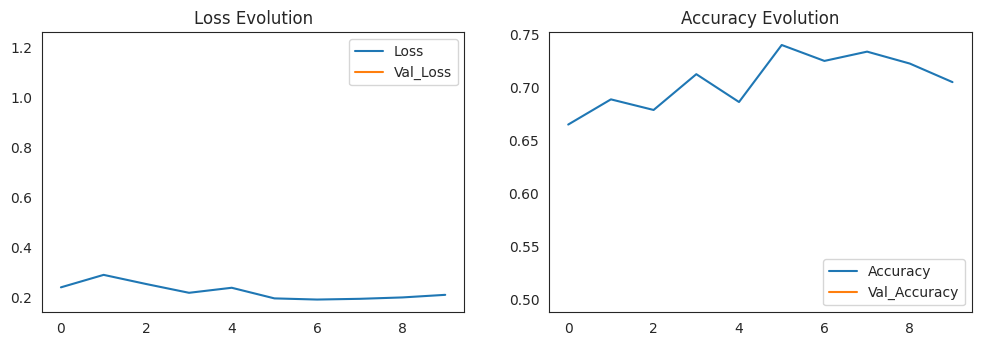

In [74]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [75]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 19s 30ms/step - loss: 0.6767 - accuracy: 0.6298 - precision: 0.6448 - recall: 0.9077
Test Accuracy: 62.98%
652/652 [==============================] - 112s 172ms/step - loss: 0.5027 - accuracy: 0.7690 - precision: 0.7900 - recall: 0.9386
Train Accuracy: 76.90%


<h2>InceptionNet</h2>

In [76]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 4s 0us/step


In [77]:
inception_model = Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [78]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.6288 - precision: 0.8417 - recall: 0.5888

100/100 [==============================] - 68s 226ms/step - loss: 0.2835 - accuracy: 0.6288 - precision: 0.8417 - recall: 0.5888 - val_loss: 16.3336 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 20s 199ms/step - loss: 0.2589 - accuracy: 0.6325 - precision: 0.8662 - recall: 0.6089
Epoch 3/10
100/100 [==============================] - 19s 191ms/step - loss: 0.1987 - accuracy: 0.7550 - precision: 0.9244 - recall: 0.7267
Epoch 4/10
100/100 [==============================] - 19s 187ms/step - loss: 0.1917 - accuracy: 0.7812 - precision: 0.9289 - recall: 0.7655
Epoch 5/10
100/100 [==============================] - 19s 185ms/step - loss: 0.1686 - accuracy: 0.8025 - precision: 0.9444 - recall: 0.7855
Epoch 6/10
100/100 [==============================] - 20s 198ms/step - loss: 0.1793 - accuracy: 0.7912 - precision: 0.9405 - recall: 0.7685
Epoch 7/10
100/100 [==============================] - 19s 190ms/step - loss: 0.1402

Text(0.5, 1.0, 'Accuracy Evolution')

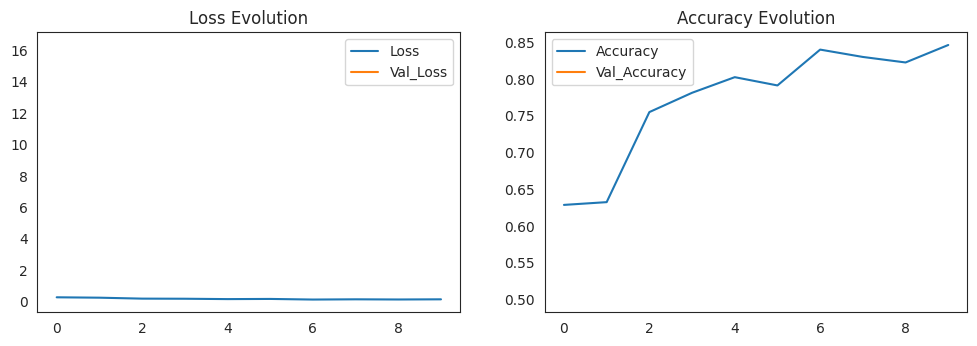

In [79]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [80]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 22s 35ms/step - loss: 0.6641 - accuracy: 0.6891 - precision: 0.6795 - recall: 0.9513
Test Accuracy: 68.91%
652/652 [==============================] - 113s 173ms/step - loss: 0.2896 - accuracy: 0.8683 - precision: 0.8815 - recall: 0.9505
Train Accuracy: 86.83%


<h2>Comparing different models<h2>

In [84]:
model_mae_scores_dict = {'CNN': 80.45, 'DenseNet121' : 85.26, 'VGG16' : 62.50, 'ResNet50' : 62.98, 'InceptionNet' : 68.91}

In [85]:
model_mae_scores = pd.Series(model_mae_scores_dict)
model_mae_scores

CNN             80.45
DenseNet121     85.26
VGG16           62.50
ResNet50        62.98
InceptionNet    68.91
dtype: float64

In [86]:
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

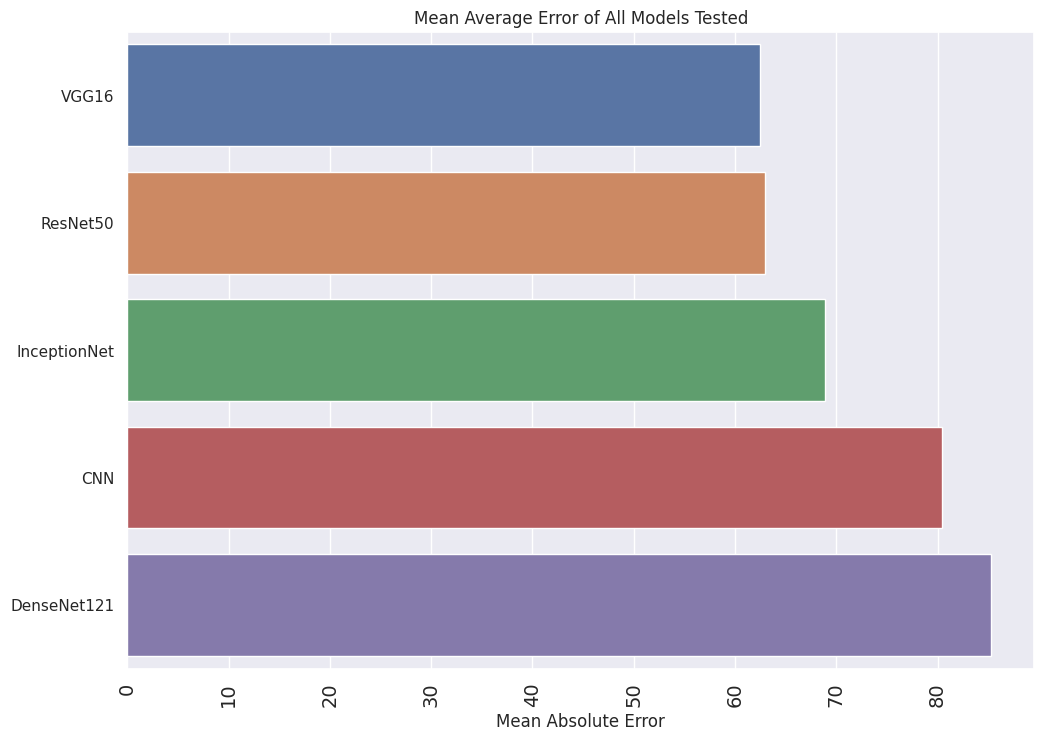

In [87]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')

<h1>Thank You</h1>